<a href="https://www.kaggle.com/code/fatimashenno/sentiment-analysis-for-tweets?scriptVersionId=127516504" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 ## 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string

import warnings
warnings.filterwarnings('ignore')

## 2. Loading Data

In [2]:
data = pd.read_csv('/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv')

In [3]:
data.head(5)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
data.rename(columns={'label (depression result)': 'label','message to examine':'message'}, inplace=True)

data.head(2)

,Index,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0


## 3. Exploring the Data

In [5]:
data.shape

(10314, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    10314 non-null  int64 
 1   message  10314 non-null  object
 2   label    10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [7]:
data.describe()

,Index,label
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


In [8]:
data.describe(include="object")

,message
count,10314
unique,10282
top,"Mom's depression tied to kids' emotional, inte..."
freq,11


In [9]:
data.label.value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [10]:
data.label.value_counts(normalize = True)

0    0.775645
1    0.224355
Name: label, dtype: float64

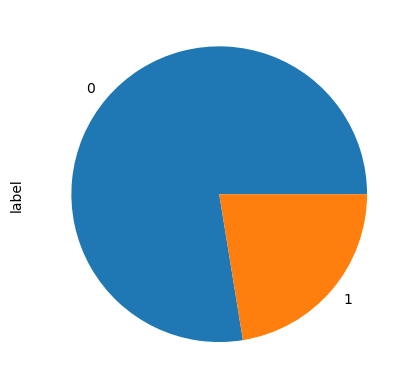

In [11]:
data.label.value_counts(normalize = True).plot.pie()
plt.show()

In [12]:
data.isnull().value_counts()

Index  message  label
False  False    False    10314
dtype: int64

In [13]:
data.isnull().sum()

Index      0
message    0
label      0
dtype: int64

In [14]:
df = data.copy()

## 4. Data Preparation

In [15]:
df['message'].unique()

array(['just had a real good moment. i missssssssss him so much, ',
       'is reading manga  http://plurk.com/p/mzp1e',
       '@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8 ',
       ...,
       'Ketamine Nasal Spray Shows Promise Against Depression, Suicide #health https://cmun.it/4sjligkÂ\xa0',
       "dont mistake a bad day with depression! everyone has 'em!", '0'],
      dtype=object)

## 4. 1. Remove URL

In [16]:
def remove_urls(text):
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    return url_pattern.sub(r'', text)

df['urlsRemoved'] = df['message'].apply(remove_urls)

df.head(10)

,Index,message,label,urlsRemoved
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!
5,624,so sleepy. good times tonight though,0,so sleepy. good times tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,"@SilkCharm re: #nbn as someone already said, d..."
7,808,23 or 24ï¿½C possible today. Nice,0,23 or 24ï¿½C possible today. Nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout in the am -ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,"@daNanner Night, darlin'! Sweet dreams to you"


## 4. 2. Remove Punctuation and Lowercasing all the letters

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['message_punct'] = df['urlsRemoved'].apply(lambda x: remove_punct(x).lower())

df.head(10)

,Index,message,label,urlsRemoved,message_punct
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!,add me on myspace
5,624,so sleepy. good times tonight though,0,so sleepy. good times tonight though,so sleepy good times tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,"@SilkCharm re: #nbn as someone already said, d...",silkcharm re nbn as someone already said does ...
7,808,23 or 24ï¿½C possible today. Nice,0,23 or 24ï¿½C possible today. Nice,or ï¿½c possible today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout in the am -ciao,nite twitterville workout in the am ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,"@daNanner Night, darlin'! Sweet dreams to you",dananner night darlin sweet dreams to you


## 4. 3. Tokenization

In [19]:
# from nltk.tokenize import word_tokenize

# def tokenize(text):
#     tokens = word_tokenize(text)
#     return tokens
# df['message_tokenized'] = df['message_punct'].apply(lambda x: tokenize(x))

# df.head(10)

## 4. 4. Remove Stop Words

In [20]:
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

In [21]:
sw_nltk.remove('not')

In [22]:
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in sw_nltk])

df['message_nostop'] = df['message_punct'].apply(lambda x: remove_stopwords(x))

df.head(10)

# def remove_stopwords(tokenized_list):
#     text = [word for word in tokenized_list if word not in sw_nltk]
#     return text

# df['message_nostop'] = df['message_punct'].apply(lambda x: remove_stopwords(x))

# df.head(10)

,Index,message,label,urlsRemoved,message_punct,message_nostop
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,is reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!,add me on myspace,add myspace
5,624,so sleepy. good times tonight though,0,so sleepy. good times tonight though,so sleepy good times tonight though,sleepy good times tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,"@SilkCharm re: #nbn as someone already said, d...",silkcharm re nbn as someone already said does ...,silkcharm nbn someone already said fiber home ...
7,808,23 or 24ï¿½C possible today. Nice,0,23 or 24ï¿½C possible today. Nice,or ï¿½c possible today nice,ï¿½c possible today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout in the am -ciao,nite twitterville workout in the am ciao,nite twitterville workout ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,"@daNanner Night, darlin'! Sweet dreams to you",dananner night darlin sweet dreams to you,dananner night darlin sweet dreams


## 4. 5. Stemming

In [23]:
ps = nltk.PorterStemmer()

In [24]:
wn = nltk.WordNetLemmatizer()

In [25]:
# def stemming(tokenized_text):
#     text = [ps.stem(word) for word in tokenized_text]
#     return text

# df['message_stemmed'] = df['message_nostop'].apply(lambda x: stemming(x))

# df.head(10)

def stemming(text):
    return " ".join([ps.stem(word) for word in text.split()])

df['message_stemmed'] = df['message_nostop'].apply(lambda x: stemming(x))
df.head(10)

,Index,message,label,urlsRemoved,message_punct,message_nostop,message_stemmed
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,is reading manga,reading manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em account tomorrow oddli was...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!,add me on myspace,add myspace,add myspac
5,624,so sleepy. good times tonight though,0,so sleepy. good times tonight though,so sleepy good times tonight though,sleepy good times tonight though,sleepi good time tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,"@SilkCharm re: #nbn as someone already said, d...",silkcharm re nbn as someone already said does ...,silkcharm nbn someone already said fiber home ...,silkcharm nbn someon alreadi said fiber home m...
7,808,23 or 24ï¿½C possible today. Nice,0,23 or 24ï¿½C possible today. Nice,or ï¿½c possible today nice,ï¿½c possible today nice,ï¿½c possibl today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout in the am -ciao,nite twitterville workout in the am ciao,nite twitterville workout ciao,nite twittervil workout ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,"@daNanner Night, darlin'! Sweet dreams to you",dananner night darlin sweet dreams to you,dananner night darlin sweet dreams,danann night darlin sweet dream


## 4. 6. Lemmatization

In [26]:
# import nltk
# nltk.download('wordnet')

# lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

In [27]:
# def lemmatizing(tokenized_text):
#     text = [wn.lemmatize(word) for word in tokenized_text]
#     return text

# df['message_lemmatized'] = df['message_nostop'].apply(lambda x: lemmatizing(x))

# df.head(10)

## 4. 7. Tokens Cleaning

In [28]:
def clean_text(text):

    ReapeatTokensRm =  " ".join( [ re.sub(r'(\w)\1{2,}', r'\1', word) for word in text.split()] )  # Remove repeating characters from tokens

    digitTokensRm =  " ".join( [ word for word in ReapeatTokensRm.split() if not re.search(r'\d', word) ] ) # Remove tokens containing digits

    underscoreTokensRm =  " ".join( [ word for word in digitTokensRm.split() if not re.search(r'_|\w*_\w*', word) ] ) # Remove tokens containing underscore

    specialTokensRm =  " ".join( [ word for word in underscoreTokensRm.split() if not re.search(r'[^a-zA-Z0-9\s]', word) ] ) # Remove tokens containing Special Characters

    return " ".join( [ word for word in specialTokensRm.split() if len(word) > 2 ] )  # Remove tokens less than 2 characters


df['cleanTokens'] = df['message_stemmed'].apply(clean_text)
df.head(10)

,Index,message,label,urlsRemoved,message_punct,message_nostop,message_stemmed,cleanTokens
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much,real good moment mis much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,is reading manga,reading manga,read manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em account tomorrow oddli was...,lapcat need send account tomorrow oddli wasnt ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!,add me on myspace,add myspace,add myspac,add myspac
5,624,so sleepy. good times tonight though,0,so sleepy. good times tonight though,so sleepy good times tonight though,sleepy good times tonight though,sleepi good time tonight though,sleepi good time tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,"@SilkCharm re: #nbn as someone already said, d...",silkcharm re nbn as someone already said does ...,silkcharm nbn someone already said fiber home ...,silkcharm nbn someon alreadi said fiber home m...,silkcharm nbn someon alreadi said fiber home m...
7,808,23 or 24ï¿½C possible today. Nice,0,23 or 24ï¿½C possible today. Nice,or ï¿½c possible today nice,ï¿½c possible today nice,ï¿½c possibl today nice,possibl today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout in the am -ciao,nite twitterville workout in the am ciao,nite twitterville workout ciao,nite twittervil workout ciao,nite twittervil workout ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,"@daNanner Night, darlin'! Sweet dreams to you",dananner night darlin sweet dreams to you,dananner night darlin sweet dreams,danann night darlin sweet dream,danann night darlin sweet dream


In [29]:
df.shape

(10314, 8)

## 5. Vectorization

## 5. 1. Count Vectorization

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features_CountVec = vectorizer.fit_transform(df['cleanTokens'])
print(features_CountVec.shape)
print('Sparse Matrix :\n', features_CountVec)
#convert to matrix
features_CountVec = pd.DataFrame(features_CountVec.toarray())
features_CountVec.columns = vectorizer.get_feature_names()
features_CountVec

(10314, 17468)
Sparse Matrix :
   (0, 12623)	1
  (0, 5923)	1
  (0, 10046)	1
  (0, 9903)	1
  (0, 10279)	1
  (1, 12616)	1
  (1, 9299)	1
  (2, 2930)	1
  (3, 8484)	1
  (3, 10541)	1
  (3, 13631)	1
  (3, 71)	1
  (3, 15704)	1
  (3, 10988)	1
  (3, 16611)	1
  (3, 4801)	1
  (3, 12725)	1
  (3, 15129)	1
  (3, 14900)	1
  (3, 4825)	1
  (3, 15492)	1
  (4, 125)	1
  (4, 10396)	1
  (5, 5923)	1
  (5, 15492)	1
  :	:
  (10309, 3766)	1
  (10309, 6536)	1
  (10310, 8743)	1
  (10310, 9246)	1
  (10310, 17336)	1
  (10310, 5080)	1
  (10310, 10602)	1
  (10310, 4644)	1
  (10310, 1843)	1
  (10310, 3766)	1
  (10310, 14784)	1
  (10311, 13898)	1
  (10311, 12105)	1
  (10311, 14468)	1
  (10311, 6422)	1
  (10311, 3766)	1
  (10311, 14813)	1
  (10311, 8166)	1
  (10311, 10479)	1
  (10312, 3582)	1
  (10312, 4172)	1
  (10312, 4818)	1
  (10312, 1110)	1
  (10312, 9949)	1
  (10312, 3766)	1


,aacerr,aacura,aah,aahahaa,aahh,aahhaha,aahth,aampb,aampd,aapoc,...,zombilici,zomg,zone,zonepray,zoo,zoot,zooyork,zpush,ztnewetnorb,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. 2. N-Grams Vectorization

In [31]:
ngram_vect = CountVectorizer(ngram_range=(1,3))
features_ngram = ngram_vect.fit_transform(df['cleanTokens'])
print(features_ngram.shape)
print('Sparse Matrix :\n', features_ngram)
features_ngram = pd.DataFrame(features_ngram.toarray())
features_ngram.columns = ngram_vect.get_feature_names()
features_ngram

(10314, 141608)
Sparse Matrix :
   (0, 99865)	1
  (0, 48276)	1
  (0, 80601)	1
  (0, 79816)	1
  (0, 82205)	1
  (0, 99909)	1
  (0, 48597)	1
  (0, 80627)	1
  (0, 79817)	1
  (0, 99910)	1
  (0, 48598)	1
  (0, 80628)	1
  (1, 99519)	1
  (1, 75957)	1
  (1, 99592)	1
  (2, 20917)	1
  (3, 66877)	1
  (3, 83867)	1
  (3, 107363)	1
  (3, 405)	1
  (3, 125598)	1
  (3, 88425)	1
  (3, 132869)	1
  (3, 36873)	1
  (3, 101076)	1
  :	:
  (10311, 113780)	1
  (10311, 109326)	1
  (10311, 96963)	1
  (10311, 116761)	1
  (10311, 64726)	1
  (10311, 83592)	1
  (10311, 113781)	1
  (10311, 109327)	1
  (10311, 96964)	1
  (10311, 29242)	1
  (10312, 25341)	1
  (10312, 32099)	1
  (10312, 37530)	1
  (10312, 8653)	1
  (10312, 80113)	1
  (10312, 8669)	1
  (10312, 27246)	1
  (10312, 32397)	1
  (10312, 27931)	1
  (10312, 25478)	1
  (10312, 8670)	1
  (10312, 80116)	1
  (10312, 32398)	1
  (10312, 80117)	1
  (10312, 25479)	1


,aacerr,aacerr smarti,aacura,aacura clip,aacura clip car,aah,aah time,aah time take,aahahaa,aahahaa goin,...,zpush,zpush sun,zpush sun love,ztnewetnorb,ztnewetnorb think,ztnewetnorb think barney,zumba,zumba class,zumba rock,zumba rock tonit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. 3. TF-IDF Vectorization

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer = TfidfVectorizer()

dataVectorized = Vectorizer.fit_transform(df['cleanTokens'])

feature_names = Vectorizer.get_feature_names_out()

pd.DataFrame(dataVectorized.toarray(), columns = feature_names)

,aacerr,aacura,aah,aahahaa,aahh,aahhaha,aahth,aampb,aampd,aapoc,...,zombilici,zomg,zone,zonepray,zoo,zoot,zooyork,zpush,ztnewetnorb,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
dataVectorized.toarray().shape

(10314, 17468)

In [34]:
feature_names[:1000]

array(['aacerr', 'aacura', 'aah', 'aahahaa', 'aahh', 'aahhaha', 'aahth',
       'aampb', 'aampd', 'aapoc', 'aaron', 'aaronmcarrol', 'aasrikayi',
       'abandon', 'abat', 'abatevintag', 'abbrevi', 'abbynorm',
       'abbyrosia', 'abc', 'abcxq', 'abdulla', 'abduzeedo', 'abe',
       'abeautyhealthi', 'abecryst', 'abeerak', 'abel', 'abhijith',
       'abhor', 'abi', 'abil', 'abit', 'abl', 'abnorm', 'aboard',
       'abokssignatur', 'abort', 'aboslut', 'abound', 'aboutl', 'abraham',
       'abroad', 'absenc', 'absent', 'absinth', 'absolout', 'absolut',
       'absolutli', 'absorb', 'abt', 'abu', 'abund', 'abus', 'abyssinian',
       'academ', 'academi', 'acc', 'accent', 'accept', 'acceptanceim',
       'access', 'accessal', 'accessori', 'accid', 'accident', 'accommod',
       'accompani', 'accomplish', 'accord', 'accordingli', 'account',
       'accout', 'acct', 'acctng', 'accur', 'accus', 'acdc', 'ace',
       'aceartemi', 'aceconcierg', 'aceppt', 'aceybongo', 'ach', 'achiev',
       'ac